### Second exploratory data analysis (EDA)

In this case, a second EDA was performed since new columns were added to the dataset.

The environment variables are loaded from a `.env` file. The main goal is to manage the configuration, and the `WORK_PATH` environment variable is used to define a working directory.

In [1]:
import sys
import os
from dotenv import load_dotenv

load_dotenv()
work_path = os.getenv('WORK_PATH')

sys.path.append(work_path)

The necessary libraries are imported for use

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sqlalchemy.orm import aliased, sessionmaker
from src.database.connection import config_loader
from src.data_process.class_processor import Processor
from src.models.models import HiredCandidate

A connection to a database is established using `connection` nd a SQLAlchemy session is created using `sessionmaker` linked to that connection. This streamlines database operations in the program.

In [3]:
connection = config_loader()

Session = sessionmaker(bind=config_loader)
session = Session()


Connected successfully to Workshop-1 database


Using SQLAlchemy, a query is made to the `(HiredCandidates)` table, along with an alias `table`, to read and load the data into a DataFrame to display the newly added columns.

In [4]:
table = aliased(HiredCandidate)
query = session.query(table).statement
df = pd.read_sql(query, connection)

df.head(5)


,id,first_name,last_name,email,application_date,country,yoe,seniority,technology,code_challenge_score,technical_interview_score,category_of_technology,hired
0,1,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3,Data and Analytics,0
1,2,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10,Data and Analytics,0
2,3,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9,Sales and Marketing,1
3,4,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1,QA and Testing,0
4,5,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7,Sales and Marketing,1


Data dictionary to identify the number of null values, data types and unique values with newly added columns

In [5]:
data_info = {
    'Column Name': list(df.columns),
    'Data Type': list(df.dtypes),
    'Null Values': list(df.isnull().sum()),
    'Unique Values': list(df.nunique())
}

info_table = pd.DataFrame(data_info)
print(info_table)


                  Column Name Data Type  Null Values  Unique Values
0                          id     int64            0          50000
1                  first_name    object            0           3007
2                   last_name    object            0            474
3                       email    object            0          49833
4            application_date    object            0           1646
5                     country    object            0            244
6                         yoe     int64            0             31
7                   seniority    object            0              7
8                  technology    object            0             24
9        code_challenge_score     int64            0             11
10  technical_interview_score     int64            0             11
11     category_of_technology    object            0              6
12                      hired     int64            0              2


Generate descriptive statistics

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,50000.0,25000.50000,14433.901067,1.0,12500.75,25000.5,37500.25,50000.0
yoe,50000.0,15.28698,8.830652,0.0,8.00,15.0,23.00,30.0
code_challenge_score,50000.0,4.99640,3.166896,0.0,2.00,5.0,8.00,10.0
technical_interview_score,50000.0,5.00388,3.165082,0.0,2.00,5.0,8.00,10.0
hired,50000.0,0.13396,0.340613,0.0,0.00,0.0,0.00,1.0


The pie chart shows the distribution of the newly created column "Category of Technology".

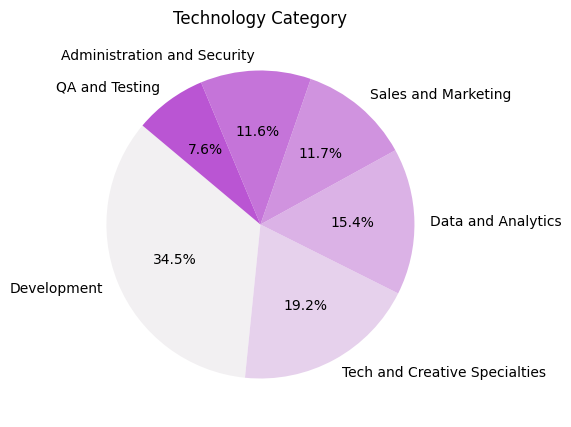

In [7]:
cat_frequency = df['category_of_technology'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(cat_frequency, labels=cat_frequency.index, autopct='%1.1f%%', startangle=140, colors=sns.light_palette('mediumorchid', n_colors=len(cat_frequency)))
plt.title('Technology Category')
plt.show()

Graph showing the number of applications per year 

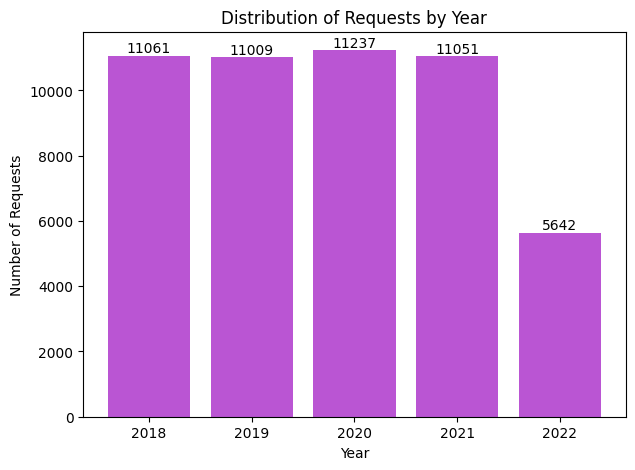

In [8]:
df['application_date'] = pd.to_datetime(df['application_date'])
df['year'] = df['application_date'].dt.year
requests_per_year = df['year'].value_counts().sort_index()

plt.figure(figsize=(7, 5))
bars = plt.bar(requests_per_year.index, requests_per_year.values, color='mediumorchid')
plt.xlabel('Year')
plt.ylabel('Number of Requests')
plt.title('Distribution of Requests by Year')

for bar in bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, y_val, round(y_val, 2), ha='center', va='bottom')

plt.show()

Number of months in 2022

In [9]:
df_2022 = df[df['application_date'].dt.year == 2022]
print(f'Number of Months in the year 2022: {df_2022["application_date"].dt.month.nunique()}')

Number of Months in the year 2022: 7


Last date of the year 2022

In [10]:
latest_date_2022 = df_2022['application_date'].max()
print(f'Latest date in 2022: {latest_date_2022.date()}')

Latest date in 2022: 2022-07-04
